<a href="https://colab.research.google.com/github/thaisflopes/modelo-de-classificacao-de-frutas/blob/main/modelo_classificacao_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Informações Iniciais

Descrição: Trata-se de um projeto para criação de um modelo de classificação de frutas, em que foram comparados dois modelos, um de SVM e outro de KNN.

Projeto desenvolvido na disciplina Fundamentos da Mineração de Dados (Data Mining).

Elaborado em 09/10/2020 por Thaís Lopes (https://github.com/thaisflopes)
___

## Contexto

Nesse projeto será analisado um conjunto de dados a respeito de laranjas e toranjas. **O objetivo é criar um modelo de classificação dessas frutas.**

Dessa forma, esse projeto está dividido em três partes:
1. A primeira consiste na análise exploratória dos dados;
2. A segunda consiste no treinamento de um modelo; e
3. A terceira consiste na validação do modelo proposto.

## 1. Análise exploratória

### 1.1. Instalando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisação
import matplotlib.pyplot as plt             #visualisação
%matplotlib inline     
sns.set(color_codes=True)

### 1.2. Carregando os dados

Como informado no Contexto, nesse projeto será usado um dataset de [laranjas x toranjas disponibilizado no Kaggle](https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit).

Os códigos a seguir baixam o arquivo para dentro do ambiente do Colab. O arquivo está no Google Drive e foi compartilhado através de um link público. 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_dir = 'archive_citrus' #nome do arquivo zip
filename = file_dir + '.zip'

In [ ]:
downloaded = drive.CreateFile({'id':"1ptcZKvlHb_4gQV9oSyLGp4ZyPAbpjk6S"}) #id do arquivo zip
downloaded.GetContentFile('archive_citrus.zip') #nome do arquivo zip    

O código seguinte descompacta o arquivo para dentro do diretório que será utilizado como fonte de dados.

In [ ]:
print(filename)

# Unzip
import zipfile
import os.path
import pathlib

zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall(file_dir)
zip_ref.close()

this_dir = pathlib.Path().absolute()

filepath = os.path.join(os.path.join(this_dir, file_dir), "citrus.csv") #nome da planilha csv
print(filepath)

archive_citrus.zip
/content/archive_citrus/citrus.csv


In [ ]:
dados = pd.read_csv(filepath)

# Para visualizar as 5 primeiras linhas
dados.head(5)               

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
# Para visualizar as 5 últimas linhas
dados.tail(5)                        

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


### 1.3. Verificando os tipos de dados


In [ ]:
dados.dtypes

name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object

Observa-se que a maioria dos dados são numéricos, tendo apenas um categórico.










### 1.4. Tratando dados categóricos

In [ ]:
dados['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [ ]:
Classe = dados['name'].replace({'orange' : 0, 'grapefruit' : 1})

In [ ]:
Classe.value_counts()

1    5000
0    5000
Name: name, dtype: int64

In [ ]:
dados['Classe'] = Classe
dados.head()

,name,diameter,weight,red,green,blue,Classe
0,orange,2.96,86.76,172,85,2,0
1,orange,3.91,88.05,166,78,3,0
2,orange,4.42,95.17,156,81,2,0
3,orange,4.47,95.60,163,81,4,0
4,orange,4.48,95.76,161,72,9,0


In [ ]:
dados = dados.drop(['name'], axis=1)
dados.head(5)

,diameter,weight,red,green,blue,Classe
0,2.96,86.76,172,85,2,0
1,3.91,88.05,166,78,3,0
2,4.42,95.17,156,81,2,0
3,4.47,95.60,163,81,4,0
4,4.48,95.76,161,72,9,0


### 1.5. Removendo linhas duplicadas

In [ ]:
dados.shape

(10000, 6)

In [ ]:
linhas_duplicadas_dados = dados[dados.duplicated()]
print("Número de linhas duplicadas: ", linhas_duplicadas_dados.shape)

Número de linhas duplicadas:  (0, 6)


O dataset não possui linhas duplicadas.



### 1.6. Eliminando os valores ausentes ou nulos

In [ ]:
print(dados.isnull().sum())

diameter    0
weight      0
red         0
green       0
blue        0
Classe      0
dtype: int64


O dataset também não possui dados ausentes.

### 1.7. Detecção de Outliers

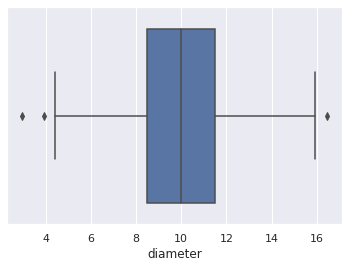

In [ ]:
sns.boxplot(x=dados['diameter'])

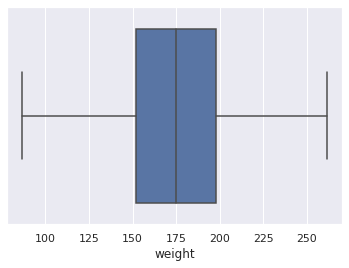

In [ ]:
sns.boxplot(x=dados['weight'])

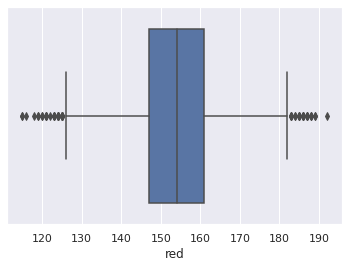

In [ ]:
sns.boxplot(x=dados['red'])

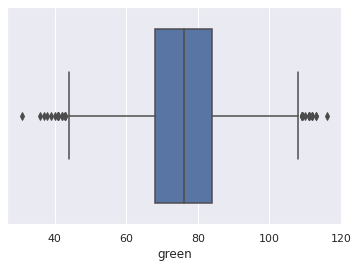

In [ ]:
sns.boxplot(x=dados['green'])

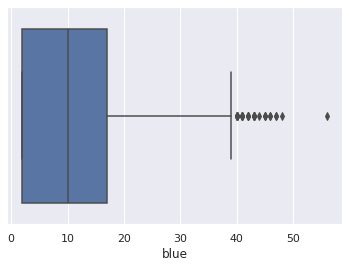

In [ ]:
sns.boxplot(x=dados['blue'])

Pelos gráficos acima, observa-se que apenas as variáveis CreditScore, Age e NumOfProducts apresentaram outliers. A seguir os outliers serão retirados da base.

In [ ]:
#Calculando os quantis inferiores e superiores
Q1 = dados.quantile(0.25)
Q3 = dados.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diameter     3.0200
weight      45.5025
red         14.0000
green       16.0000
blue        15.0000
Classe       1.0000
dtype: float64


In [ ]:
#Removendo os outliers presentes nos quantis inferiores e superiores
dados = dados[~((dados < (Q1 - 1.5 * IQR)) |(dados > (Q3 + 1.5 * IQR))).any(axis=1)]
dados.shape

(9868, 6)

In [ ]:
10000-9868

132

Foram encontrados 132 outliers.

### 1.8. Visualização dos dados

,diameter,weight,red,green,blue,Classe
diameter,1.000000,0.999505,-0.213654,-0.398062,0.363679,0.771532
weight,0.999505,1.000000,-0.210664,-0.393344,0.359329,0.762297
red,-0.213654,-0.210664,1.000000,0.147070,-0.132092,-0.280313
green,-0.398062,-0.393344,0.147070,1.000000,-0.243985,-0.510385
blue,0.363679,0.359329,-0.132092,-0.243985,1.000000,0.467759
Classe,0.771532,0.762297,-0.280313,-0.510385,0.467759,1.000000


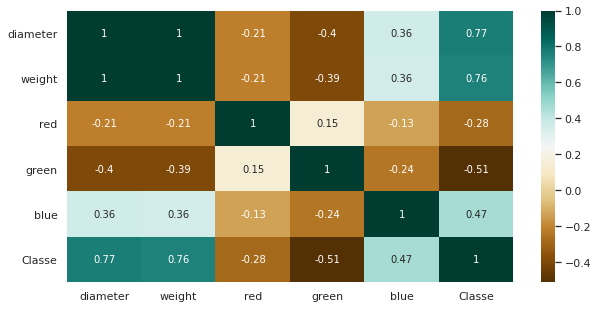

In [ ]:
plt.figure(figsize=(10,5))
c= dados.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


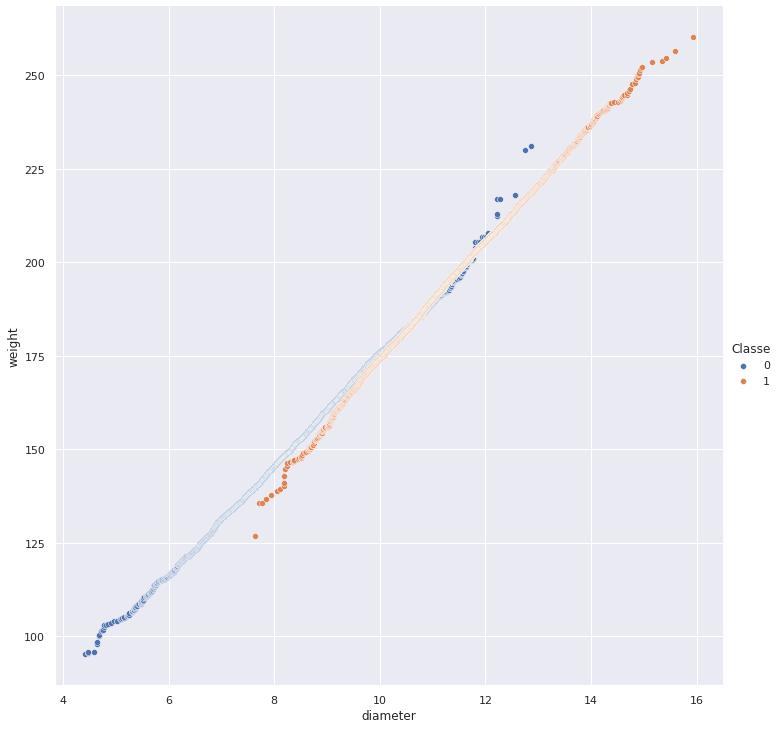

In [ ]:
#diameter e weight - correlação: 1,0
g = sns.FacetGrid(dados, hue="Classe", size=10)
g.map_dataframe(sns.scatterplot, x="diameter", y="weight")
g.set_axis_labels("diameter", "weight")
g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


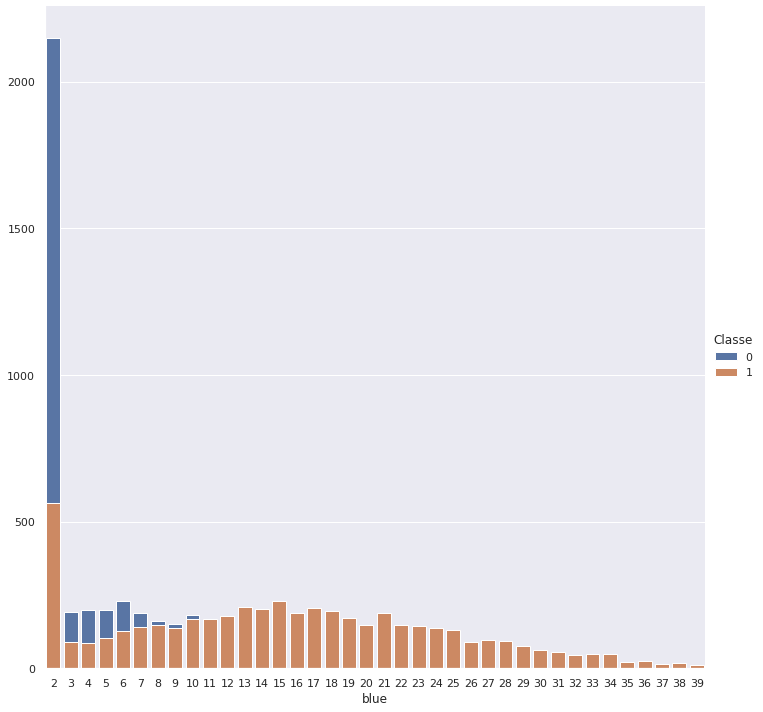

In [ ]:
#blue e classe - correlação: 0,47
g = sns.FacetGrid(dados, hue='Classe', size=10)
g.map(sns.countplot, 'blue')
g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


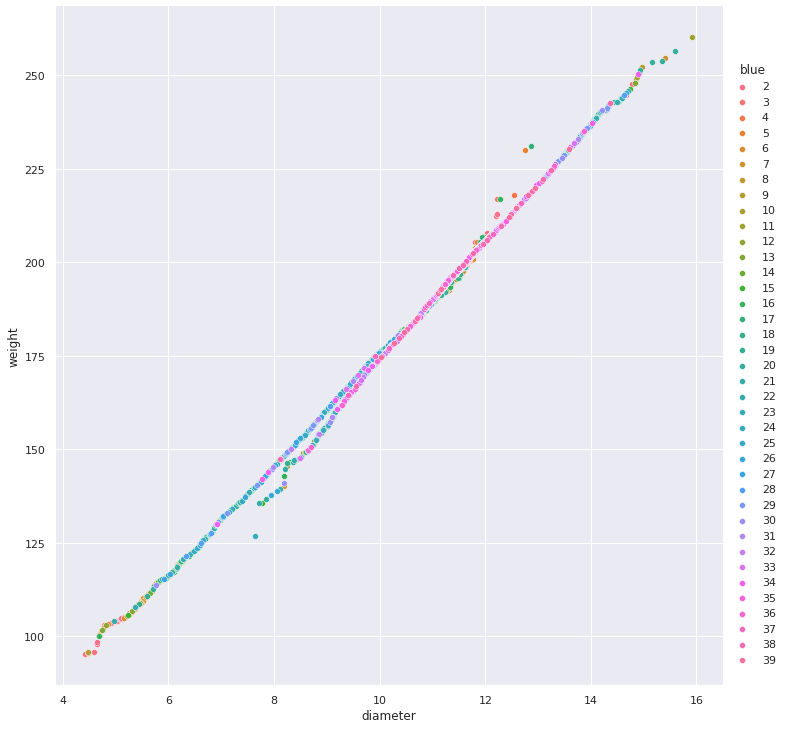

In [ ]:
# diameter, weight e blue - correlação: 0,36
g = sns.FacetGrid(dados, hue="blue", size=10)
g.map_dataframe(sns.scatterplot, x="diameter", y="weight")
g.set_axis_labels("diameter", "weight")
g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


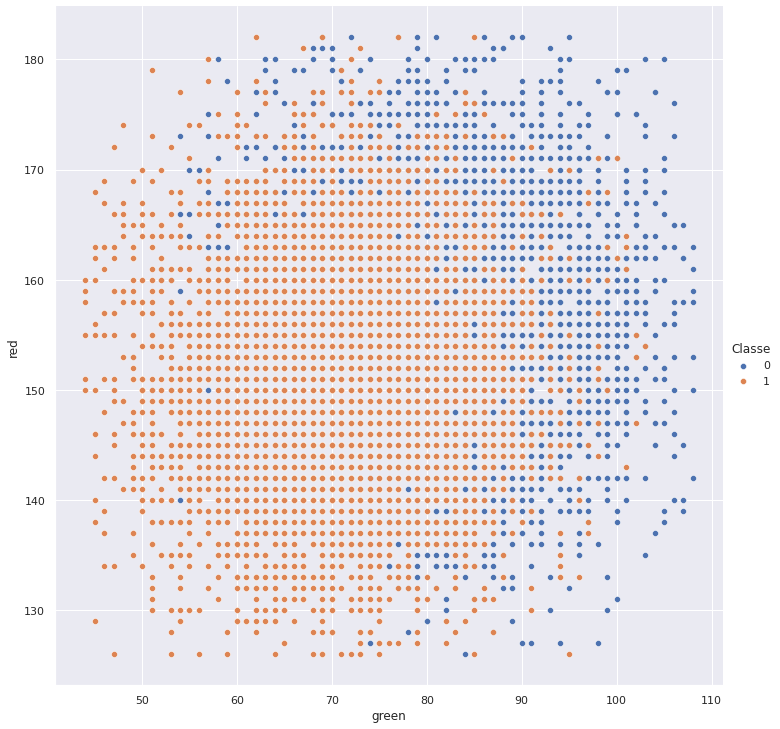

In [ ]:
#green e red - correlação 0,15
g = sns.FacetGrid(dados, hue="Classe", size=10)
g.map_dataframe(sns.scatterplot, x="green", y="red")
g.set_axis_labels("green", "red")
g.add_legend()

# 2. Treianmento e Validação

## 2.1. Dividindo dados de treino, teste e validação


In [ ]:
#Dividindo os dados de treino e validação pela técnica Holdout (80% e 20%)
from sklearn.model_selection import train_test_split
X_treino, X_validacao, y_treino, y_validacao = train_test_split(dados, classes, test_size=0.2)

In [ ]:
#Dividindo os dados de treino e teste pela técnica Holdout (80% e 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.2)

## 2.2. Modelo SVM

### 2.2.1. Treinamento 

### Aplicando o SVM com os dados divididos pela técnica Holdout

In [ ]:
#Baixando a biblioteca e instanciando o algonitmo SVM
from sklearn import svm
clf = svm.SVC()

In [ ]:
#Treinando o algoritmo SVM
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predição dos valores com os dados de teste
predicao_svm = clf.predict(X_test)
predicao_svm

array([1, 0, 0, ..., 1, 0, 0])

### Avaliação dos resultados do treinamento do modelo SVM

Confusion matrix:
 [[737  57]
 [ 62 723]]


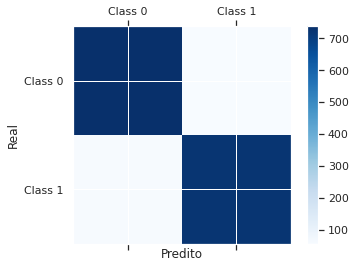

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicao_svm)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
#Precision, Recall, F1 Score e Accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicao_svm))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       794
           1       0.93      0.92      0.92       785

    accuracy                           0.92      1579
   macro avg       0.92      0.92      0.92      1579
weighted avg       0.92      0.92      0.92      1579



### 2.2.2. Validação


In [ ]:
#Predição dos valores com os dados de teste
predicao_svm_val = clf.predict(X_validacao)
predicao_svm_val

array([1, 0, 0, ..., 1, 0, 1])

Confusion matrix:
 [[975  76]
 [ 75 848]]


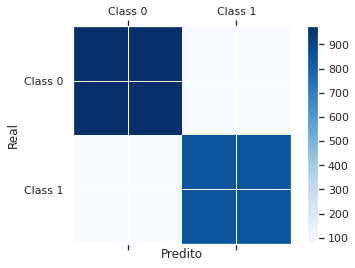

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_validacao, y_pred=predicao_svm_val)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
#Precision, Recall, F1 Score e Accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_validacao, predicao_svm_val))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1051
           1       0.92      0.92      0.92       923

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



### Cross Validation

In [ ]:
#Cross validation e métricas com os dados de validação do SVM
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
resultados_svm = cross_val_predict(clf,X_validacao, y_validacao, cv=5)
valor_classes = [0,1]
print (metrics.classification_report(y_validacao,resultados_svm,valor_classes))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1051
           1       0.93      0.91      0.92       923

    accuracy                           0.93      1974
   macro avg       0.93      0.92      0.93      1974
weighted avg       0.93      0.93      0.93      1974



## 2.3. Modelo KNN

### 2.3.1. Treinamento

### Aplicando o KNN com os dados divididos pela técnica Holdout

In [ ]:
#Baixando a biblioteca e instanciando o algonitmo KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
#Treinando o algoritmo KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#Predição dos valores com os dados de teste do KNN
predicao_knn = knn.predict(X_test)
predicao_knn

array([1, 0, 0, ..., 1, 0, 0])

### Avaliação dos resultados do treinamento do modelo KNN

Confusion matrix:
 [[750  44]
 [125 660]]


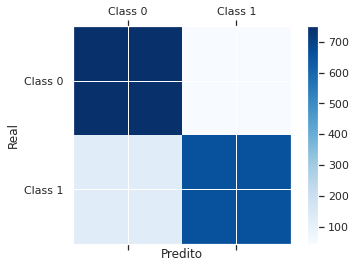

In [ ]:
#Matriz de confusão
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicao_knn)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
#Precision, Recall, F1 Score e Accuracy
print(classification_report(y_test, predicao_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       794
           1       0.94      0.84      0.89       785

    accuracy                           0.89      1579
   macro avg       0.90      0.89      0.89      1579
weighted avg       0.90      0.89      0.89      1579



### 2.3.2. Validação

In [ ]:
#Predição dos valores com os dados de teste do KNN
predicao_knn_val = knn.predict(X_validacao)
predicao_knn_val

array([1, 0, 0, ..., 1, 0, 1])

Confusion matrix:
 [[992  59]
 [153 770]]


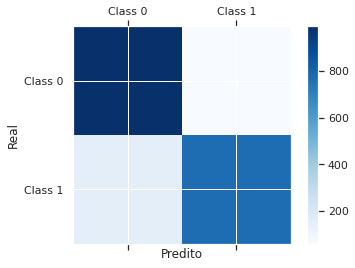

In [ ]:
#Matriz de confusão
conf_mat = confusion_matrix(y_true=y_validacao, y_pred=predicao_knn_val)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
#Precision, Recall, F1 Score e Accuracy
print(classification_report(y_validacao, predicao_knn_val))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1051
           1       0.93      0.83      0.88       923

    accuracy                           0.89      1974
   macro avg       0.90      0.89      0.89      1974
weighted avg       0.90      0.89      0.89      1974



### Cross validation

In [ ]:
#Cross validation e métricas com os dados de validação do KNN
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
resultados_knn = cross_val_predict(knn,X_validacao, y_validacao, cv=5)
valor_classes = [0,1]
print (metrics.classification_report(y_validacao,resultados_knn,valor_classes))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1051
           1       0.95      0.81      0.88       923

    accuracy                           0.89      1974
   macro avg       0.90      0.89      0.89      1974
weighted avg       0.90      0.89      0.89      1974



# 3. Conclusões

Como os dados são balanceados, a acurácia pode ser utilizada para comparar os dois modelos. Assim, observa-se que o SVM apresentou um desempenho melhor que o KNN tanto durante o treinamento como após a cross validation. Isso também pode ser observado pelas curvas ROC abaixo, em que a área da curva do SVM é maior do que a do KNN.


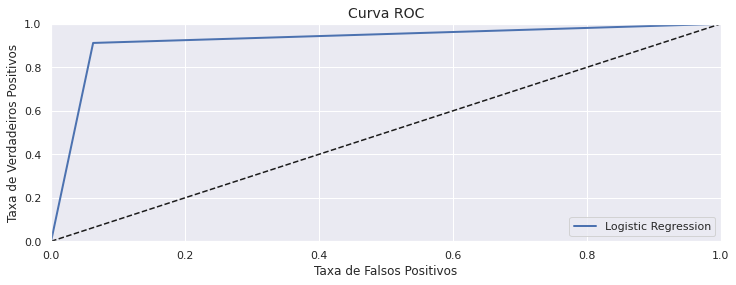

In [ ]:
#Curva ROC do SVM
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_validacao, resultados_svm)
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()

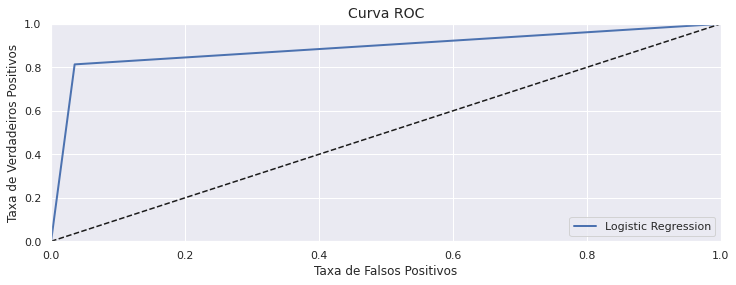

In [ ]:
#Curva ROC do KNN
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_validacao, resultados_knn)
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()